# 🔬 Baseline: SVM

Approccio **tradizionale** di Machine Learning:
- Classificazione con **SVM** (Support Vector Machine)


## 📦 Imports

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from tqdm import tqdm
import pickle

# Sklearn imports
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report
)

# Computer vision
from skimage.io import imread
import cv2

# Plotting
%matplotlib inline
sns.set_style('whitegrid')

print("✅ Imports completati!")

✅ Imports completati!


## 📂 Configurazione Paths

In [9]:
# Paths
DATA_DIR = Path('../data/raw')
TRAIN_DIR = DATA_DIR / 'train'
TEST_DIR = DATA_DIR / 'test'
RESULTS_DIR = Path('../results')
RESULTS_DIR.mkdir(exist_ok=True)

# Parametri immagini
IMG_SIZE = (64, 64)

print(f"📁 Train dir: {TRAIN_DIR}")
print(f"📁 Test dir: {TEST_DIR}")

📁 Train dir: ..\data\raw\train
📁 Test dir: ..\data\raw\test


## 🖼️ Caricamento Dati

Carichiamo le immagini dalle cartelle `ok/` e `def_front/`

In [10]:
def load_images(data_dir):
    """Carica immagini da directory con sottocartelle ok/ e def_front/"""
    images = []
    labels = []
    
    # Classe 0: OK
    ok_dir = data_dir / 'ok'
    for img_path in ok_dir.glob('*.jpeg'):
        img = imread(str(img_path), as_gray=True)
        img = cv2.resize(img, IMG_SIZE)
        images.append(img)
        labels.append(0)
    
    # Classe 1: Defective
    def_dir = data_dir / 'def_front'
    for img_path in def_dir.glob('*.jpeg'):
        img = imread(str(img_path), as_gray=True)
        img = cv2.resize(img, IMG_SIZE)
        images.append(img)
        labels.append(1)
    
    return np.array(images), np.array(labels)

# Carica training e test
print("Caricamento training set...")
X_train, y_train = load_images(TRAIN_DIR)
print(f"✅ Train: {len(X_train)} immagini")
print(f"   - OK: {np.sum(y_train == 0)}")
print(f"   - Defective: {np.sum(y_train == 1)}")

print("\nCaricamento test set...")
X_test, y_test = load_images(TEST_DIR)
print(f"✅ Test: {len(X_test)} immagini")
print(f"   - OK: {np.sum(y_test == 0)}")
print(f"   - Defective: {np.sum(y_test == 1)}")

Caricamento training set...
✅ Train: 6633 immagini
   - OK: 2875
   - Defective: 3758

Caricamento test set...
✅ Test: 715 immagini
   - OK: 262
   - Defective: 453


### Visualizza Esempi

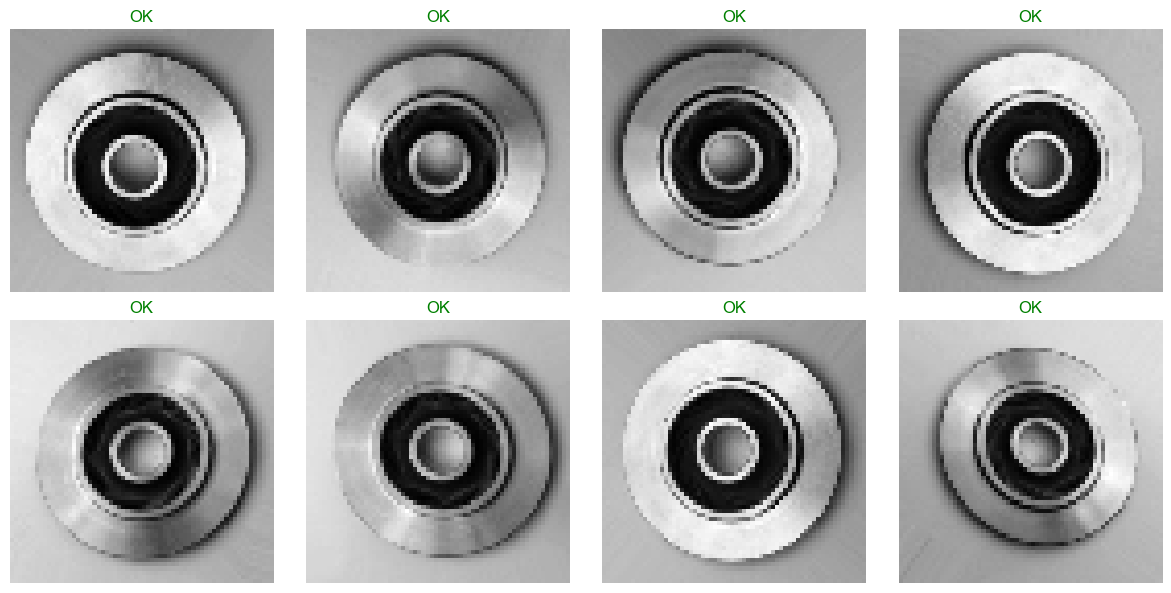

In [11]:
# Plot 8 esempi
fig, axes = plt.subplots(2, 4, figsize=(12, 6))
axes = axes.flatten()

for i in range(8):
    axes[i].imshow(X_train[i], cmap='gray')
    label = 'OK' if y_train[i] == 0 else 'DEFECTIVE'
    axes[i].set_title(label, color='green' if y_train[i] == 0 else 'red')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

## 🤖 Training SVM con Grid Search

Troviamo i **migliori hyperparameters** automaticamente

In [26]:
# 1. Appiattimento (Flattening)
# Trasforma (6633, 64, 64) in (6633, 4096)
n_samples = len(X_train)
X_train_flat = X_train.reshape((n_samples, -1))

n_test = len(X_test)
X_test_flat = X_test.reshape((n_test, -1))

print(f"✅ Shape dopo flattening: {X_train_flat.shape}")

# 2. Configurazione SVM Singolo (Senza GridSearch per velocità)
# Usiamo parametri standard ragionevoli
print("🚀 Inizio training (SVM su pixel grezzi)...")

# C=10 e gamma='scale' sono buoni standard
svm_naive = SVC(C=1, kernel='rbf', gamma='scale', random_state=42) 

# 3. Addestramento (Usa la versione FLAT!)
svm_naive.fit(X_train_flat, y_train)

print(f"\n✅ Training completato!")

# 4. Valutazione veloce
from sklearn.metrics import accuracy_score, classification_report

y_pred = svm_naive.predict(X_test_flat) # Anche qui usa _flat!
print(f"Accuracy Pixel Grezzi: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))

✅ Shape dopo flattening: (6633, 4096)
🚀 Inizio training (SVM su pixel grezzi)...

✅ Training completato!
Accuracy Pixel Grezzi: 0.9706
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       262
           1       0.99      0.97      0.98       453

    accuracy                           0.97       715
   macro avg       0.97      0.97      0.97       715
weighted avg       0.97      0.97      0.97       715



## 📊 Valutazione su Test Set

In [27]:

# Predizioni
y_pred = svm_naive.predict(X_test_flat)

# Metriche
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("📈 Performance su Test Set:")
print(f"  Accuracy:  {acc:.4f}")
print(f"  Precision: {prec:.4f}")
print(f"  Recall:    {rec:.4f}")
print(f"  F1 Score:  {f1:.4f}")

print("\n" + classification_report(y_test, y_pred, target_names=['OK', 'Defective']))

📈 Performance su Test Set:
  Accuracy:  0.9706
  Precision: 0.9865
  Recall:    0.9669
  F1 Score:  0.9766

              precision    recall  f1-score   support

          OK       0.94      0.98      0.96       262
   Defective       0.99      0.97      0.98       453

    accuracy                           0.97       715
   macro avg       0.97      0.97      0.97       715
weighted avg       0.97      0.97      0.97       715



## 🎨 Confusion Matrix

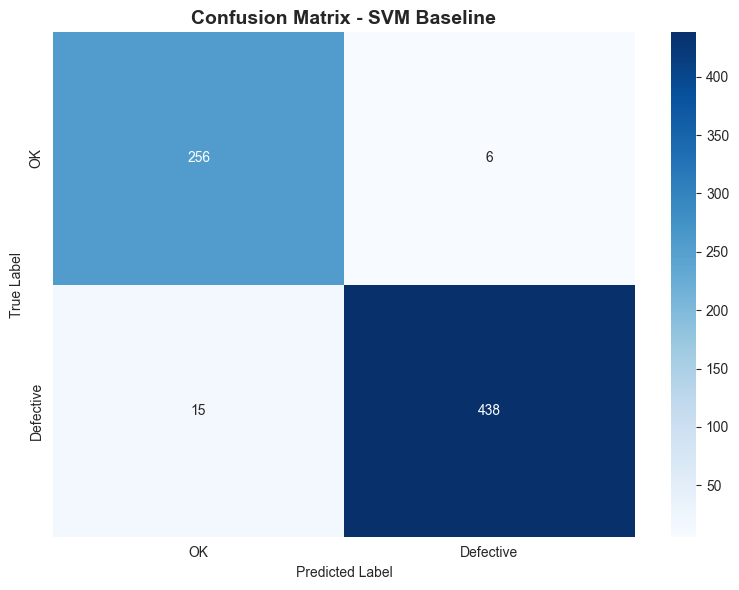

✅ Confusion matrix salvata in: ..\results\svm_confusion_matrix.png


In [28]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['OK', 'Defective'],
            yticklabels=['OK', 'Defective'])
plt.title('Confusion Matrix - SVM Baseline', fontsize=14, fontweight='bold')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.savefig(RESULTS_DIR / 'svm_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"✅ Confusion matrix salvata in: {RESULTS_DIR / 'svm_confusion_matrix.png'}")

## 💾 Salva Modello

In [31]:
# Salva modello
model_path = RESULTS_DIR / 'svm_model.pkl'
with open(model_path, 'wb') as f:
    pickle.dump(svm_naive, f)

print(f"✅ Modello salvato in: {model_path}")

# Salva metriche
results = {
    'accuracy': float(acc),
    'precision': float(prec),
    'recall': float(rec),
    'f1_score': float(f1)
}

import json
with open(RESULTS_DIR / 'svm_results.json', 'w') as f:
    json.dump(results, f, indent=4)

print(f"✅ Risultati salvati in: {RESULTS_DIR / 'svm_results.json'}")

✅ Modello salvato in: ..\results\svm_model.pkl
✅ Risultati salvati in: ..\results\svm_results.json


## 🎉 Fine!

Hai trainato un SVM baseline usando:
- ✅ HOG per feature extraction
- ✅ Grid Search per hyperparameter tuning
- ✅ Metriche complete

**Prossimo step**: Apri `02_resnet_training.ipynb` per il deep learning! 🚀